In [152]:
# step 1: import the libraries and upload the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
#below is a new package needed for this lab
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import os

os.chdir("/Users/lucaslisman/Desktop/DS J-Term/")
import seaborn as sns

# Random Forest

In [153]:
# open the dataset.csv file 
accidents = pd.read_csv('cville_accidentsModel.csv')
# inspect the types of each column
accidents.dtypes
accidents.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,31910,A-31910,2,2016-12-01 12:19:37,2016-12-01 18:19:37,38.175522,-78.407423,38.164358,-78.414532,0.863,...,False,False,False,False,False,False,Day,Day,Day,Day
1,32851,A-32851,3,2016-12-05 09:25:43,2016-12-05 15:25:43,38.123890,-78.444780,38.123919,-78.444748,0.003,...,False,False,False,False,False,False,Day,Day,Day,Day
2,33648,A-33648,2,2016-12-07 07:33:53,2016-12-07 13:33:53,38.170954,-78.410337,38.163851,-78.414851,0.549,...,False,False,False,False,False,False,Day,Day,Day,Day
3,33670,A-33670,2,2016-12-07 07:49:21,2016-12-07 14:04:50,38.173332,-78.408818,38.163883,-78.414830,0.730,...,False,False,False,False,False,False,Day,Day,Day,Day
4,33689,A-33689,2,2016-12-07 08:37:45,2016-12-07 14:37:45,38.034930,-78.606930,38.032470,-78.598830,0.472,...,False,False,False,False,False,False,Day,Day,Day,Day


In [154]:
# check how many nas 
accidents.isna().sum()
# not too many nas, so we can drop them 
accidents = accidents.dropna()
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             875 non-null    int64  
 1   ID                     875 non-null    object 
 2   Severity               875 non-null    int64  
 3   Start_Time             875 non-null    object 
 4   End_Time               875 non-null    object 
 5   Start_Lat              875 non-null    float64
 6   Start_Lng              875 non-null    float64
 7   End_Lat                875 non-null    float64
 8   End_Lng                875 non-null    float64
 9   Distance.mi.           875 non-null    float64
 10  Description            875 non-null    object 
 11  Number                 875 non-null    float64
 12  Street                 875 non-null    object 
 13  Side                   875 non-null    object 
 14  City                   875 non-null    object 
 15  Coun

In [155]:
accidents = accidents.drop(["Unnamed: 0","Start_Lat","Start_Lng", "End_Lat","End_Lng","ID","Start_Time","End_Time","Street", "City", "County", "Zipcode","Weather_Timestamp","Description", "Number","State","Country","Airport_Code","Timezone","Amenity","Bump","Give_Way","No_Exit","Railway","Roundabout","Station","Traffic_Calming","Turning_Loop"],axis=1)

In [156]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               875 non-null    int64  
 1   Distance.mi.           875 non-null    float64
 2   Side                   875 non-null    object 
 3   Temperature.F.         875 non-null    float64
 4   Wind_Chill.F.          875 non-null    float64
 5   Humidity...            875 non-null    float64
 6   Pressure.in.           875 non-null    float64
 7   Visibility.mi.         875 non-null    float64
 8   Wind_Direction         875 non-null    object 
 9   Wind_Speed.mph.        875 non-null    float64
 10  Precipitation.in.      875 non-null    float64
 11  Weather_Condition      875 non-null    object 
 12  Crossing               875 non-null    bool   
 13  Junction               875 non-null    bool   
 14  Stop                   875 non-null    bool   
 15  Traf

In [157]:
#### Make variables categorical
accidents['Side'] = accidents['Side'].astype("category")

accidents['Wind_Direction'] = accidents['Wind_Direction'].astype("category")

accidents['Weather_Condition'] = accidents['Weather_Condition'].astype("category")

accidents['Crossing'] = accidents['Crossing'].astype("category")

accidents['Junction'] = accidents['Junction'].astype("category")

accidents['Traffic_Signal'] = accidents['Traffic_Signal'].astype("category")

accidents['Sunrise_Sunset'] = accidents['Sunrise_Sunset'].astype("category")

accidents['Civil_Twilight'] = accidents['Civil_Twilight'].astype("category")

accidents['Nautical_Twilight'] = accidents['Nautical_Twilight'].astype("category")

accidents['Astronomical_Twilight'] = accidents['Astronomical_Twilight'].astype("category")

accidents['Stop'] = accidents['Stop'].astype("category")



In [158]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Severity               875 non-null    int64   
 1   Distance.mi.           875 non-null    float64 
 2   Side                   875 non-null    category
 3   Temperature.F.         875 non-null    float64 
 4   Wind_Chill.F.          875 non-null    float64 
 5   Humidity...            875 non-null    float64 
 6   Pressure.in.           875 non-null    float64 
 7   Visibility.mi.         875 non-null    float64 
 8   Wind_Direction         875 non-null    category
 9   Wind_Speed.mph.        875 non-null    float64 
 10  Precipitation.in.      875 non-null    float64 
 11  Weather_Condition      875 non-null    category
 12  Crossing               875 non-null    category
 13  Junction               875 non-null    category
 14  Stop                   875 non-null    c

In [159]:
accidents2 = accidents.drop(["Weather_Condition", "Wind_Direction", "Stop", "Junction"],axis = 1)

In [160]:
accidents2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Severity               875 non-null    int64   
 1   Distance.mi.           875 non-null    float64 
 2   Side                   875 non-null    category
 3   Temperature.F.         875 non-null    float64 
 4   Wind_Chill.F.          875 non-null    float64 
 5   Humidity...            875 non-null    float64 
 6   Pressure.in.           875 non-null    float64 
 7   Visibility.mi.         875 non-null    float64 
 8   Wind_Speed.mph.        875 non-null    float64 
 9   Precipitation.in.      875 non-null    float64 
 10  Crossing               875 non-null    category
 11  Traffic_Signal         875 non-null    category
 12  Sunrise_Sunset         875 non-null    category
 13  Civil_Twilight         875 non-null    category
 14  Nautical_Twilight      875 non-null    c

In [161]:
accidents2["Distance"] = accidents2["Distance.mi."]

In [162]:
accidents2 = accidents2.drop(["Distance.mi."], axis = 1)

In [163]:
accidents.head()

,Severity,Distance.mi.,Side,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Crossing,Junction,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
87,2,0.078,R,60.0,60.0,93.0,28.82,2.0,N,3.0,0.09,Rain,False,False,False,False,Day,Day,Day,Day
88,2,0.028,L,80.0,80.0,45.0,29.42,10.0,E,9.0,0.00,Fair,False,False,False,False,Day,Day,Day,Day
89,4,0.047,L,84.0,84.0,44.0,29.33,10.0,S,7.0,0.00,Fair,False,False,False,False,Day,Day,Day,Day
90,2,0.105,R,51.0,51.0,22.0,29.60,10.0,CALM,0.0,0.00,Fair,False,False,False,False,Day,Day,Day,Day
94,2,0.175,R,89.0,89.0,50.0,29.29,10.0,VAR,3.0,0.00,Fair,False,False,False,True,Day,Day,Day,Day


/var/folders/gz/7h0l2_4j6fld7vp7x2k94bhr0000gn/T/ipykernel_88520/4077005793.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =accidents.corr()


<Axes: >

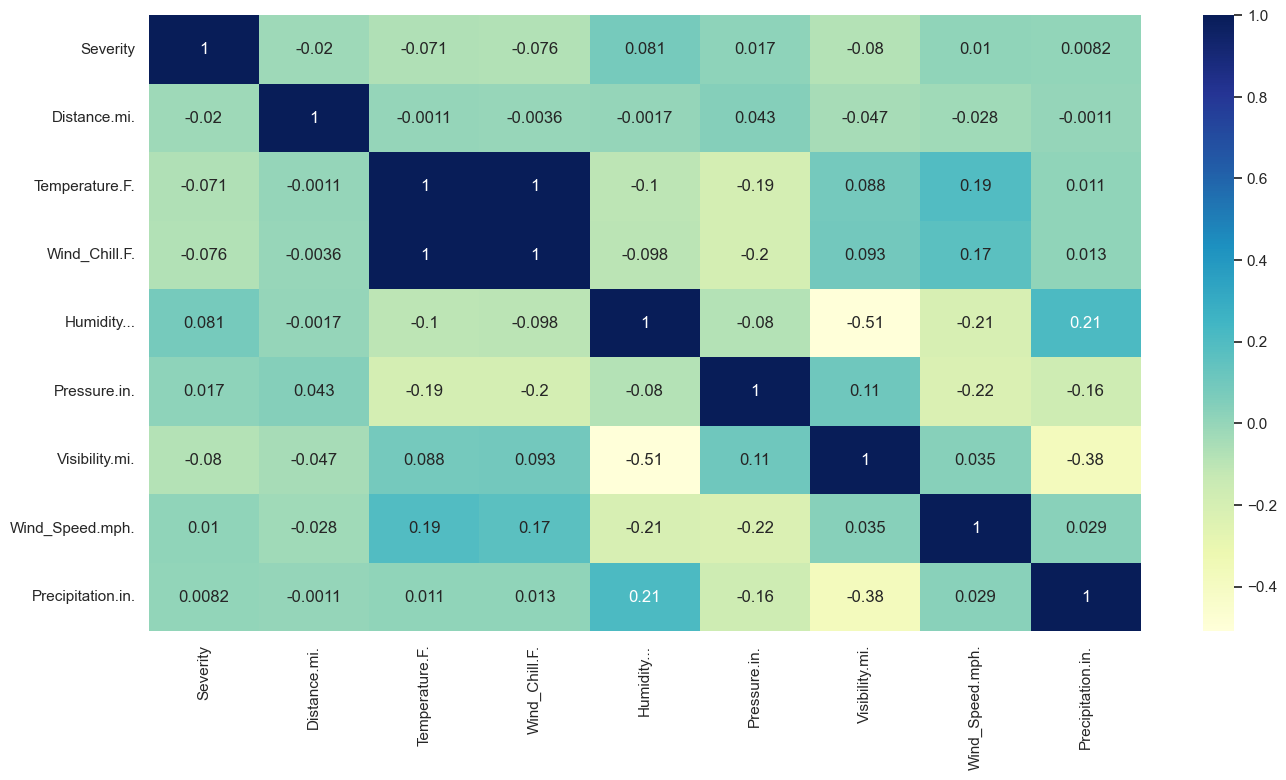

In [164]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr =accidents.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

                                 Numeric Features Distribution                                  


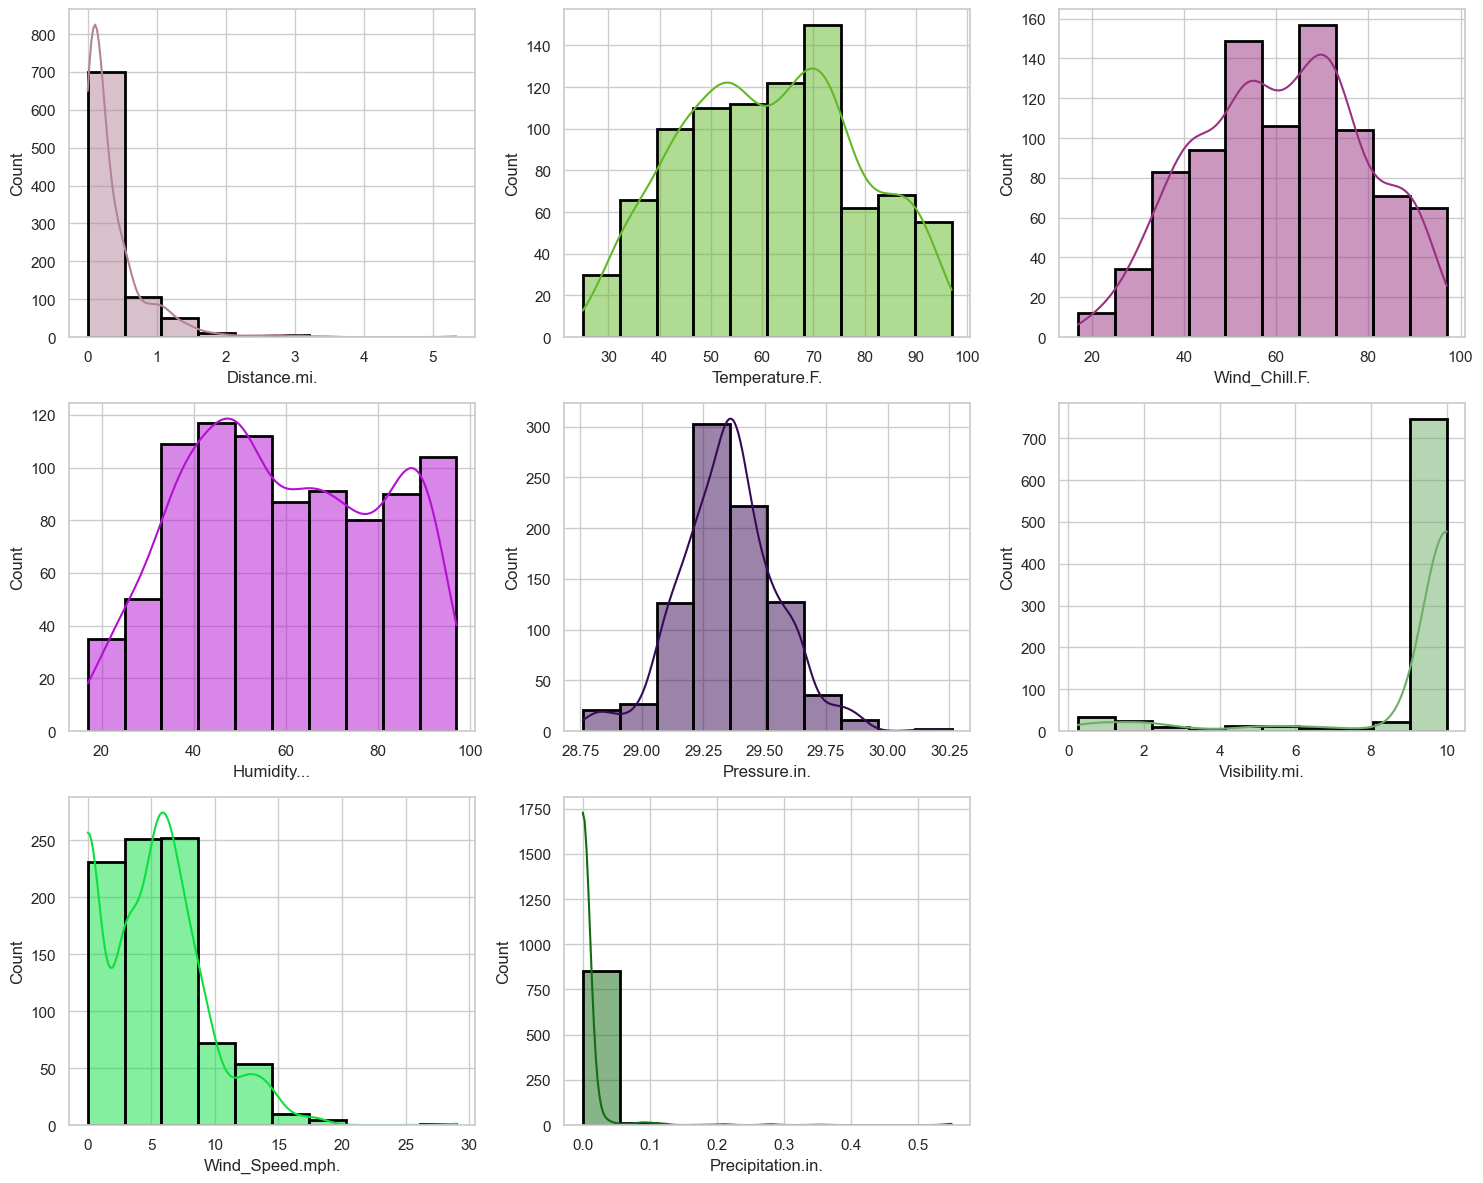

In [165]:
import math


target_column = 'Severity'
numerical_features = accidents.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(target_column)


print('\033[1mNumeric Features Distribution'.center(100))

# Define number of subplots per row
subplots_per_row = 3
num_rows = math.ceil(len(numerical_features) / subplots_per_row)

plt.figure(figsize=[15, 4 * num_rows])

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, subplots_per_row, i + 1)
    sns.histplot(
        accidents[feature],
        kde=True,  # Add a kernel density estimate
        color=list(np.random.randint([255, 255, 255]) / 255),
        edgecolor="black", 
        linewidth=2,
        bins=10
    )

plt.tight_layout()
plt.show()


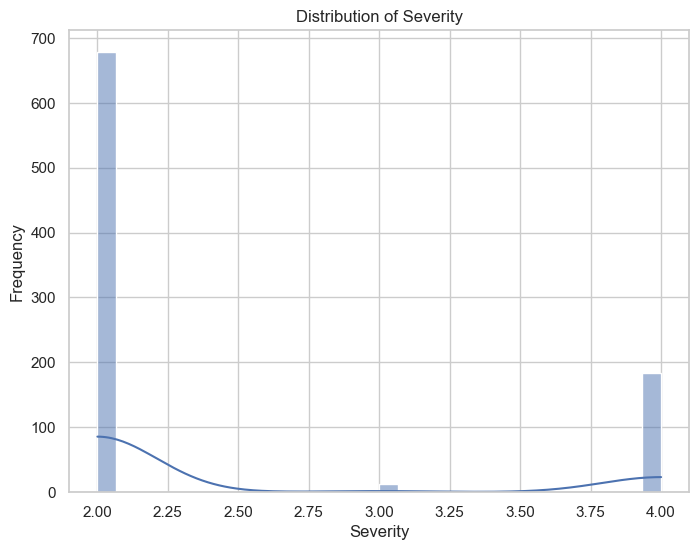

In [166]:
plt.figure(figsize=(8, 6))
sns.histplot(accidents["Severity"], bins=30, kde=True)
plt.title("Distribution of Severity")
plt.xlabel("Severity")
plt.ylabel("Frequency")
plt.show()

In [167]:
## Make dummy variables
cat_cols = accidents.select_dtypes(include='category').columns
print(cat_cols)

encoded = pd.get_dummies(accidents[cat_cols])
encoded.head()

# now we want to drop the old columns we onehot encoded 
accidents = accidents.drop(cat_cols, axis=1)

# and then join them
accidents = accidents.join(encoded)

print(accidents.info())

Index(['Side', 'Wind_Direction', 'Weather_Condition', 'Crossing', 'Junction',
       'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Severity                                   875 non-null    int64  
 1   Distance.mi.                               875 non-null    float64
 2   Temperature.F.                             875 non-null    float64
 3   Wind_Chill.F.                              875 non-null    float64
 4   Humidity...                                875 non-null    float64
 5   Pressure.in.                               875 non-null    float64
 6   Visibility.mi.                             875 non-null    float64
 7   Wind_Speed.mph.  

In [168]:
y = accidents['Severity']
X = accidents.drop(['Severity'], axis = 1)

In [169]:
print(accidents2["Distance"])

87      0.078
88      0.028
89      0.047
90      0.105
94      0.175
        ...  
2033    0.091
2036    0.301
2037    1.442
2038    1.442
2039    0.118
Name: Distance, Length: 875, dtype: float64


In [170]:
# lets create a function that will change the Severity to either 0 or 1
def accidents_change(Severity):
    if Severity > 2:
        return 1
    else:
        return 0

# lets apply this function to our y variable
y = y.apply(accidents_change)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify= y, random_state=21) 
# test size = 40%

In [172]:
#Check the output
print(y_train.value_counts())
print(y_test.value_counts())

0    474
1    138
Name: Severity, dtype: int64
0    204
1     59
Name: Severity, dtype: int64


In [173]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25,50, 100, 200],
   'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 25}


In [174]:
#Tested and were not as effective

In [175]:
print('max_features = ' + str(np.sqrt(X.shape[1]))) #7.7

RFC = RandomForestClassifier(n_estimators=500, #<- Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.
                max_features= 8, #<- Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p).
                bootstrap= True, #<-Whether bootstrap samples are used when building trees
                max_samples = 100,  #<- Size of sample to draw each time.
                min_samples_leaf= 2, #<- Minimum numbers of data points in terminal nodes.
                max_leaf_nodes= None, #<- Maximum number of terminal nodes trees in the forest can have. 
                max_depth= 10, #<-The maximum depth of the tree
                oob_score =True, #<-Whether to use out-of-bag samples to estimate the generalization score
            warm_start =True, #<- Whether to reuse the solution of the previous call to fit and add more estimators to the ensemble
            random_state= 42,
            n_jobs= -1, #<- Number of cores to use for parallel processing (-1 will use all available)
            verbose=True,
            class_weight='balanced') #<- Whether to print progress messages to stdout.

accidents_RF= RFC.fit(X_train,y_train)

# finished in 5.1 seconds

max_features = 7.745966692414834


/Users/lucaslisman/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished


In [176]:
print('OOB error rate: ' + str(1-accidents_RF.oob_score_))

OOB error rate: 0.23856209150326801


False Positive Rate: 0.0105
True Positive Rate: 0.1304
Precision: 0.7826


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Accuracy: 0.7958


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


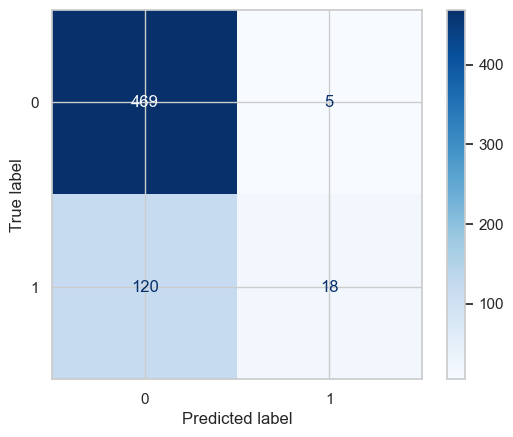

In [177]:
# Generate predictions on the training set
y_pred_train = accidents_RF.predict(X_train)

# Obtain the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr = cm[0, 1] / (cm[0, 0] + cm[0, 1])
tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=accidents_RF.classes_).plot(cmap='Blues')

# Display FPR and TPR
print(f"False Positive Rate: {fpr:.4f}")
print(f"True Positive Rate: {tpr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accidents_RF.score(X_train, y_train):.4f}")

In [178]:
#determining feature importance

np.argmax(accidents_RF.oob_decision_function_,axis=1)
print(pd.DataFrame(accidents_RF.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False))

                                           importance
Distance.mi.                                 0.127673
Humidity...                                  0.118163
Temperature.F.                               0.110671
Wind_Chill.F.                                0.106334
Pressure.in.                                 0.102992
Wind_Speed.mph.                              0.071816
Weather_Condition_Fair                       0.025313
Visibility.mi.                               0.021853
Side_R                                       0.020229
Side_L                                       0.019198
Weather_Condition_Cloudy                     0.019184
Wind_Direction_CALM                          0.016321
Wind_Direction_VAR                           0.015728
Sunrise_Sunset_Night                         0.015211
Wind_Direction_S                             0.014224
Wind_Direction_SSW                           0.013289
Civil_Twilight_Night                         0.012710
Precipitation.in.           

In [247]:
from sklearn.metrics import classification_report, accuracy_score

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = accidents_RF.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set it to 0.4)
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
print(f"Accuracy with adjusted threshold ({threshold}): {accuracy_score(y_test, y_pred_adjusted)}")
print(classification_report(y_test, y_pred_adjusted))

Accuracy with adjusted threshold (0.4): 0.2777777777777778
              precision    recall  f1-score   support

           0       0.67      0.23      0.34        88
           1       0.13      0.50      0.20        20

    accuracy                           0.28       108
   macro avg       0.40      0.36      0.27       108
weighted avg       0.57      0.28      0.31       108



/Users/lucaslisman/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [180]:
# Threshold of 0.4 is best

# KNN

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [206]:
# open the dataset.csv file 
accidentsKnn = pd.read_csv('cville_accidentsModel.csv')
# inspect the types of each column
accidentsKnn.dtypes
accidentsKnn.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,31910,A-31910,2,2016-12-01 12:19:37,2016-12-01 18:19:37,38.175522,-78.407423,38.164358,-78.414532,0.863,...,False,False,False,False,False,False,Day,Day,Day,Day
1,32851,A-32851,3,2016-12-05 09:25:43,2016-12-05 15:25:43,38.123890,-78.444780,38.123919,-78.444748,0.003,...,False,False,False,False,False,False,Day,Day,Day,Day
2,33648,A-33648,2,2016-12-07 07:33:53,2016-12-07 13:33:53,38.170954,-78.410337,38.163851,-78.414851,0.549,...,False,False,False,False,False,False,Day,Day,Day,Day
3,33670,A-33670,2,2016-12-07 07:49:21,2016-12-07 14:04:50,38.173332,-78.408818,38.163883,-78.414830,0.730,...,False,False,False,False,False,False,Day,Day,Day,Day
4,33689,A-33689,2,2016-12-07 08:37:45,2016-12-07 14:37:45,38.034930,-78.606930,38.032470,-78.598830,0.472,...,False,False,False,False,False,False,Day,Day,Day,Day


In [207]:
# check how many nas 
accidentsKnn.isna().sum()
# not too many nas, so we can drop them 
accidentsKnn = accidentsKnn.dropna()

In [209]:
accidentsKnn = accidentsKnn.drop(["Unnamed: 0","Start_Lat","Start_Lng", "End_Lat","End_Lng","ID","Start_Time","End_Time","Street", "City", "County", "Zipcode","Weather_Timestamp","Description", "Number","State","Country","Airport_Code","Timezone","Amenity","Bump","Give_Way","No_Exit","Railway","Roundabout","Station","Traffic_Calming","Turning_Loop"],axis=1)

In [211]:
#### Make variables categorical
accidentsKnn['Side'] = accidentsKnn['Side'].astype("category")

accidentsKnn['Wind_Direction'] = accidentsKnn['Wind_Direction'].astype("category")

accidentsKnn['Weather_Condition'] = accidentsKnn['Weather_Condition'].astype("category")

accidentsKnn['Crossing'] = accidentsKnn['Crossing'].astype("category")

accidentsKnn['Junction'] = accidentsKnn['Junction'].astype("category")

accidentsKnn['Traffic_Signal'] = accidentsKnn['Traffic_Signal'].astype("category")

accidentsKnn['Sunrise_Sunset'] = accidentsKnn['Sunrise_Sunset'].astype("category")

accidentsKnn['Civil_Twilight'] = accidentsKnn['Civil_Twilight'].astype("category")

accidentsKnn['Nautical_Twilight'] = accidentsKnn['Nautical_Twilight'].astype("category")

accidentsKnn['Astronomical_Twilight'] = accidentsKnn['Astronomical_Twilight'].astype("category")



In [212]:
accidentsKnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Severity               875 non-null    int64   
 1   Distance.mi.           875 non-null    float64 
 2   Side                   875 non-null    category
 3   Temperature.F.         875 non-null    float64 
 4   Wind_Chill.F.          875 non-null    float64 
 5   Humidity...            875 non-null    float64 
 6   Pressure.in.           875 non-null    float64 
 7   Visibility.mi.         875 non-null    float64 
 8   Wind_Direction         875 non-null    category
 9   Wind_Speed.mph.        875 non-null    float64 
 10  Precipitation.in.      875 non-null    float64 
 11  Weather_Condition      875 non-null    category
 12  Crossing               875 non-null    category
 13  Junction               875 non-null    category
 14  Stop                   875 non-null    b

In [213]:
Severe = [3,4]
accidentsKnn.Severity = accidentsKnn.Severity.apply(lambda x: "Severe" if x in Severe else "Mild")
print(accidentsKnn.Severity.value_counts())
accidentsKnn['Severity'] = accidentsKnn['Severity'].astype("category")

Mild      678
Severe    197
Name: Severity, dtype: int64


In [215]:
# now, we normalize the numeric variables
numeric_cols = accidentsKnn.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['Distance.mi.', 'Temperature.F.', 'Wind_Chill.F.', 'Humidity...',
       'Pressure.in.', 'Visibility.mi.', 'Wind_Speed.mph.',
       'Precipitation.in.'],
      dtype='object')


In [216]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(accidentsKnn[numeric_cols])   # conduct data transformation
scaled_df = pd.DataFrame(d, columns=numeric_cols)   # convert back to pd df; transformation converts to array
accidentsKnn[numeric_cols] = scaled_df   # put data back into the main df

In [217]:
accidentsKnn.describe()   # as we can see, the data is now normalized!

,Distance.mi.,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.067888,0.493269,0.536156,0.530639,0.395022,0.902849,0.166391,0.016848
std,0.092279,0.236226,0.223403,0.266766,0.138569,0.260683,0.144479,0.097027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.012399,0.305556,0.350000,0.312500,0.306667,1.000000,0.000000,0.000000
50%,0.036496,0.472222,0.525000,0.525000,0.396667,1.000000,0.172414,0.000000
75%,0.086468,0.666667,0.700000,0.771875,0.480000,1.000000,0.241379,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
# Now, we onehot encode the data -- for reference, this is the process of converting categorical variables to a usable form for 
# a machine learning algorithm.

cat_cols = accidentsKnn.select_dtypes(include='category').columns
print(cat_cols)

encoded = pd.get_dummies(accidentsKnn[cat_cols])
encoded.head()   # note the new columns

Index(['Severity', 'Side', 'Wind_Direction', 'Weather_Condition', 'Crossing',
       'Junction', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


,Severity_Mild,Severity_Severe,Side_L,Side_R,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_N,Wind_Direction_NE,...,Traffic_Signal_False,Traffic_Signal_True,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
87,1,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
88,1,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
89,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
90,1,0,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
94,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [219]:

# now we want to drop the old columns we onehot encoded 
accidentsKnn = accidentsKnn.drop(cat_cols, axis=1)

# and then join them
accidentsKnn = accidentsKnn.join(encoded)

print(accidentsKnn.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875 entries, 87 to 2039
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Distance.mi.                               450 non-null    float64
 1   Temperature.F.                             450 non-null    float64
 2   Wind_Chill.F.                              450 non-null    float64
 3   Humidity...                                450 non-null    float64
 4   Pressure.in.                               450 non-null    float64
 5   Visibility.mi.                             450 non-null    float64
 6   Wind_Speed.mph.                            450 non-null    float64
 7   Precipitation.in.                          450 non-null    float64
 8   Stop                                       875 non-null    bool   
 9   Severity_Mild                              875 non-null    uint8  
 10  Severity_Severe         

In [220]:
accidentsKnn = accidentsKnn.dropna()

In [221]:
# -------- Train model! -------- Check Prevalence
print(accidentsKnn['Severity_Severe'].value_counts()[1] / accidentsKnn ['Severity_Severe'].count())
# This means that at random, we have an 11.6% chance of correctly picking a subscribed individual. Let's see if kNN can do any better.

0.18888888888888888


In [222]:
train, test = train_test_split(accidentsKnn,  test_size=0.4, stratify = accidentsKnn['Severity_Severe']) 
test, val = train_test_split(test, test_size=0.4, stratify=test['Severity_Severe'])


In [225]:
# now, let's train the classifier for k=9
import random
random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = train.drop(['Severity_Severe'], axis=1).values
y_train = train['Severity_Severe'].values

neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [226]:
# now, we check the model's accuracy on the test data:

X_val = val.drop(['Severity_Severe'], axis=1).values
y_val = val['Severity_Severe'].values

print(neigh.score(X_val, y_val))

0.875


In [227]:
# now, we test the accuracy on our validation data.

X_test = test.drop(['Severity_Severe'], axis=1).values
y_test = test['Severity_Severe'].values

print(neigh.score(X_test, y_test))

0.8796296296296297


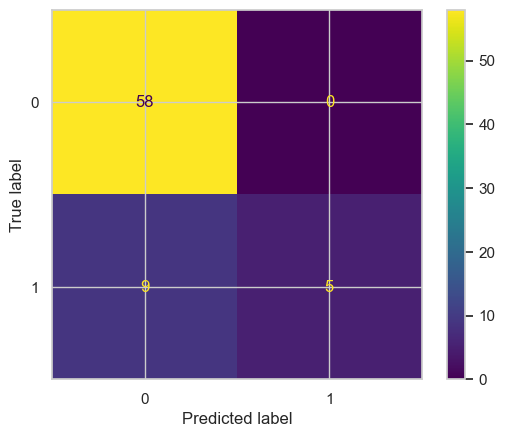

In [228]:
# -------- Evaluate model --------

# create a confusion matrix
y_val_pred = neigh.predict(X_val)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val,y_val_pred, labels=neigh.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)  
disp.plot()
plt.show()

In [229]:
# create a classification report
# create classification report
from sklearn.metrics import classification_report

print(classification_report(y_val_pred, y_val))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        67
           1       0.36      1.00      0.53         5

    accuracy                           0.88        72
   macro avg       0.68      0.93      0.73        72
weighted avg       0.96      0.87      0.90        72



In [249]:

# we didn't get sensitivity and specificity, so we'll calculate that ourselves.
sensitivity = 5/(5+9)   # = TP/(TP+FN)
specificity = 58/(58+0)   # = TN/(TN+FP)
print('Sensitivity: '+ str(sensitivity) + ' Specificity: ' + str(specificity))

Sensitivity: 0.35714285714285715 Specificity: 1.0


In [231]:
# ------- Selecting the correct 'k' ---------
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k")    # I'll include this so you can see the progress of the function as it runs
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accu = class_knn.score(X_test, y_test)
    return accu

# We'll test odd k values from 1 to 21. We want to create a table of all the data, so we'll use list comprehension to create 
# the "accuracy" column. 

#%%
# REMEMBER: Python is end-exclusive; we want UP to 21 to we'll have to extend the end bound to include it
test = pd.DataFrame({'k':list(range(1,22,2)), 
                     'accu':[chooseK(i, X_train, y_train, X_test, y_test) for i in list(range(1, 22, 2))]})

#%%
print(test.head())

#%%
test = test.sort_values(by=['accu'], ascending=False)
print(test.head())

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k
   k      accu
0  1  0.888889
1  3  0.851852
2  5  0.888889
3  7  0.833333
4  9  0.879630
     k      accu
8   17  0.907407
9   19  0.907407
10  21  0.907407
6   13  0.898148
0    1  0.888889


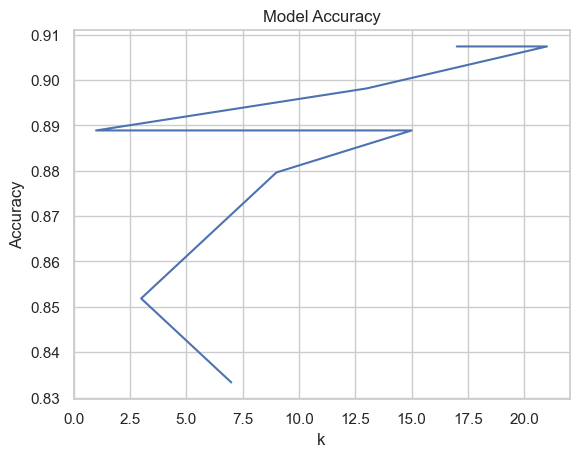

In [232]:
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [233]:
# Staying on k = 9

In [234]:
# -------- Adjusting the threshold --------
# we want to make a table containing: probability, expected, and actual values

test_probs = neigh.predict_proba(X_test)
test_preds = neigh.predict(X_test)

In [235]:

# convert probabilities to pd df
test_probabilities = pd.DataFrame(test_probs, columns = ['Mild', 'Severe'])
test_probabilities.head()
#%%
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': test_probabilities['Severe']})
final_model.head()

,actual_class,pred_class,pred_prob
0,0,0,0.000000
1,0,0,0.000000
2,0,0,0.000000
3,0,0,0.111111
4,0,0,0.000000


In [236]:
# convert classes to categories
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

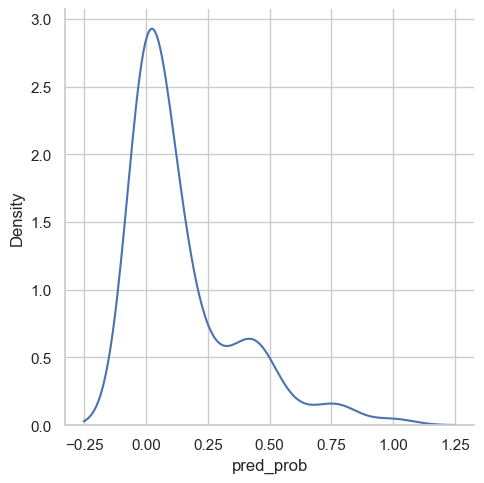

In [237]:
# create probability distribution graph
import seaborn as sns

sns.displot(final_model, x="pred_prob", kind="kde")

In [238]:
print(final_model.pred_prob.value_counts())

0.000000    55
0.111111    23
0.444444    11
0.222222     7
0.333333     5
0.777778     3
0.555556     2
1.000000     1
0.666667     1
Name: pred_prob, dtype: int64


In [240]:

# In most datasets, the probabilities range between 0 and 1, causing uncertain predictions. A threshold must be set for 
# where you consider the prediction to actually be a part of the positive class.
# This is where you have more control over your model's classifications. **This is especially useful for reducing incorrect 
# classifications that you may have noticed in your confusion matrix.**

from sklearn.metrics import confusion_matrix

def adjust_thres(x, y, z):
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = confusion_matrix(z, thres)  
    print(con_mat)


print(confusion_matrix(final_model.actual_class, final_model.pred_class))   # original model

print(adjust_thres(final_model.pred_prob, .90, final_model.actual_class))   # raise threshold 

print(adjust_thres(final_model.pred_prob, .2, final_model.actual_class))   # lower threshold


[[88  0]
 [13  7]]
[[88  0]
 [19  1]]
None
[[75 13]
 [ 3 17]]
None


In [ ]:
#Threshold of 0.2 is best for our research

## Visually Display Random Forest Model

##### Use shift to select multiple features

In [245]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import voila

# Load your dataset
df = pd.read_csv('cville_accidentsModel.csv')

# Columns for feature selection
feature_columns = ['Distance.mi.', 'Temperature.F.', 'Wind_Chill.F.', 'Humidity...',
       'Pressure.in.', 'Visibility.mi.', 'Wind_Speed.mph.',
       'Precipitation.in.']

# Create feature selection widget
feature_selection = widgets.SelectMultiple(
    options=feature_columns,
    value=feature_columns[:3],  # Default selected features
    description='Select Features:'
)

# Function to update the dashboard based on user selection
def update_dashboard(features):
    # Select features from the dataset
    selected_features = df[list(features)]

    # Impute missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    selected_features_imputed = pd.DataFrame(imputer.fit_transform(selected_features), columns=selected_features.columns)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_features_imputed, df['Severity'], test_size=0.3, random_state=42)

    # Train the random forest model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Display accuracy and confusion matrix
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Interactive dashboard
interactive_dashboard = widgets.interactive(update_dashboard, features=feature_selection)
display(interactive_dashboard)



interactive(children=(SelectMultiple(description='Select Features:', index=(0, 1, 2), options=('Distance.mi.',…

## Visually Display Knn Model

##### Use shift to select multiple features

In [243]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import voila

# Load your dataset
df = pd.read_csv('cville_accidentsModel.csv')

# Columns for feature selection
feature_columns = ['Distance.mi.', 'Temperature.F.', 'Wind_Chill.F.', 'Humidity...',
       'Pressure.in.', 'Visibility.mi.', 'Wind_Speed.mph.',
       'Precipitation.in.']

# Create feature selection widget
feature_selection = widgets.SelectMultiple(
    options=feature_columns,
    value=feature_columns[:3],  # Default selected features
    description='Select Features:'
)

# Function to update the dashboard based on user selection
def update_dashboard(features):
    # Select features from the dataset
    selected_features = df[list(features)]

    # Impute missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    selected_features_imputed = pd.DataFrame(imputer.fit_transform(selected_features), columns=selected_features.columns)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_features_imputed, df['Severity'], test_size=0.3, random_state=42)

    # Train the k-Nearest Neighbors model
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Display accuracy and confusion matrix
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Interactive dashboard
interactive_dashboard = widgets.interactive(update_dashboard, features=feature_selection)
display(interactive_dashboard)



interactive(children=(SelectMultiple(description='Select Features:', index=(0, 1, 2), options=('Distance.mi.',…

## Visually Display XGBoost Model

##### Use shift to select multiple features

In [246]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import voila

# Load your dataset
df = pd.read_csv('cville_accidentsModel.csv')

# Columns for feature selection
feature_columns = ['Distance.mi.', 'Temperature.F.', 'Wind_Chill.F.', 'Humidity...',
       'Pressure.in.', 'Visibility.mi.', 'Wind_Speed.mph.',
       'Precipitation.in.']

# Encode the 'Severity' column
label_encoder = LabelEncoder()
df['Severity'] = label_encoder.fit_transform(df['Severity'])

# Create feature selection widget
feature_selection = widgets.SelectMultiple(
    options=feature_columns,
    value=feature_columns[:3],  # Default selected features
    description='Select Features:'
)

# Function to update the dashboard based on user selection
def update_dashboard(features):
    # Select features from the dataset
    selected_features = df[list(features)]

    # Impute missing values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    selected_features_imputed = pd.DataFrame(imputer.fit_transform(selected_features), columns=selected_features.columns)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(selected_features_imputed, df['Severity'], test_size=0.3, random_state=42)

    # Train the XGBoost model
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Display accuracy and confusion matrix
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)

    # Plot confusion matrix with a different color
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Interactive dashboard
interactive_dashboard = widgets.interactive(update_dashboard, features=feature_selection)
display(interactive_dashboard)


interactive(children=(SelectMultiple(description='Select Features:', index=(0, 1, 2), options=('Distance.mi.',…

# Link to Shiny App Maps

Maps showing accidents in the Charlottesville area & selected roads passing through Charlottesville. 

Variables can be altered on the map to see different trends.

[Traffic Accidents Report](https://amv7av.shinyapps.io/Traffic_Report/)